In [1]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.read_csv("user_behavior_dataset_cleaned.csv")
df = df.drop(columns=['User_ID', 'Age', 'App_Usage_Time_outlier', 'Screen_On_Time_outlier', 'Battery_Drain_outlier', 'Data_Usage_outlier'])
df.head()

,Device_Model,Operating_System,App_Usage_Time,Screen_On_Time,Battery_Drain,Number_of_Apps_Installed,Data_Usage,Gender,User_Behavior_Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,Female,3


In [4]:
x = df.drop(columns=['Screen_On_Time'])
y = df['Screen_On_Time']

In [5]:
X_encoded = pd.get_dummies(x)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [8]:
y_pred = lasso.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.928964050839774
Mean Squared Error: 0.6373648348724344


Text(0.5, 1.0, 'Lasso Regressor - Actual vs Predicted')

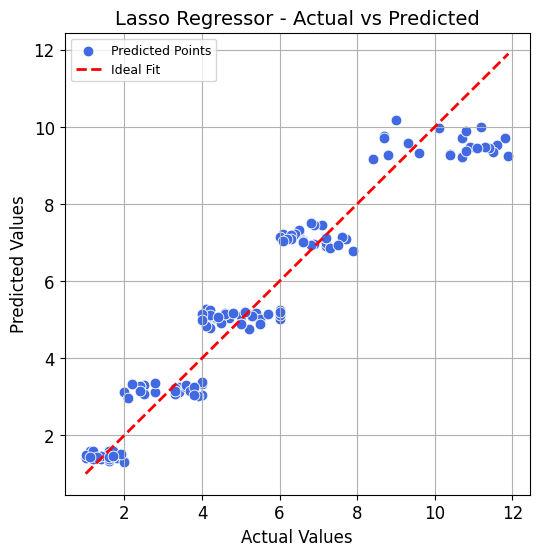

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predicted vs actual
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', edgecolor='w', s=60, label='Predicted Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2, label='Ideal Fit')
plt.legend(fontsize=9)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Actual Values', fontsize = 12)
plt.ylabel('Predicted Values', fontsize = 12)
plt.title('Lasso Regressor - Actual vs Predicted', fontsize = 14)
